## Figure 4 Plot 
Using patchwork to combine the plots into a single figure

In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(patchwork)))
suppressPackageStartupMessages(suppressWarnings(library(cowplot)))
suppressPackageStartupMessages(suppressWarnings(library(RcppTOML)))
suppressPackageStartupMessages(suppressWarnings(library(pheatmap)))
suppressPackageStartupMessages(suppressWarnings(library(lattice)))
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer)))
suppressPackageStartupMessages(suppressWarnings(library(gplots)))
suppressPackageStartupMessages(suppressWarnings(library(ComplexHeatmap)))
suppressPackageStartupMessages(suppressWarnings(library(ggplotify)))
suppressPackageStartupMessages(suppressWarnings(library(viridis)))
suppressPackageStartupMessages(suppressWarnings(library(platetools)))
suppressPackageStartupMessages(suppressWarnings(library(circlize)))
suppressPackageStartupMessages(suppressWarnings(library(reshape2)))



In [2]:
# set the cell type
cell_type <- "PBMC"


In [3]:
# set the path to the data files
df_stats_path <- file.path(
    paste0("../../6.bulk_Morphology_Elastic_Network/2.test_model/results/regression/",cell_type,"/aggregated_with_nomic/model_stats.csv"
    )
    )
df_variance_path <- file.path(
    paste0("../../6.bulk_Morphology_Elastic_Network/2.test_model/results/regression/",cell_type,"/aggregated_with_nomic/variance_r2_stats.csv"
    )
)

# set the path to the figure output
enet_cp_fig_path <- paste0("./figures/regression/",cell_type,"/aggregated_with_nomic/")
# if path does not exist, create it
if (!file.exists(dirname(enet_cp_fig_path))) {
    print(dirname(enet_cp_fig_path))
    dir.create(dirname(enet_cp_fig_path), recursive = TRUE)
}

# read the data
df_stats <- read.csv(df_stats_path)
df_variance <- read.csv(df_variance_path)


In [4]:
head(df_stats)
head(df_variance)
# remove '[]' from the string in the column
df_variance$r2 <- gsub("\\[|\\]", "", df_variance$r2)
# set the column as numeric
df_variance$r2 <- as.numeric(df_variance$r2)
head(df_variance)


,explained_variance,neg_mean_absolute_error,neg_mean_squared_error,well,treatment,r2,cytokine,data_split,shuffle,predicted_value,actual_value,log10_neg_mean_absolute_error,log10_neg_mean_squared_error,log10_explained_variance
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.12876296,-0.016579900,B05,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6226146,0.8902090,1.7804181,0
2,1,-0.09606601,-0.009228678,B08,LPS_0.010_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.4031387,1.0174302,2.0348605,0
3,1,-0.21557860,-0.046474132,B10,LPS_Nigericin_100.000_1.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.7073632,0.6663944,1.3327887,0
4,1,-0.57668367,-0.332564053,C02,LPS_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1619233,0.2390623,0.4781247,0
5,1,-0.11961401,-0.014307512,C05,LPS_Nigericin_100.000_3.0_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.6136835,0.9222179,1.8444359,0
6,1,-0.31175502,-0.097191194,C06,DMSO_0.100_DMSO_0.025,0,GFbeta,train_data,final,0.4969174,0.1925851,0.5061865,1.0123731,0


,cytokine,data_split,shuffle,predicted_value,actual_value,r2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,XCL1(Lymphotactin),test_data,final,0.020480504,0.02890534,[0.65955376]
2,XCL1(Lymphotactin),train_data,final,0.019216161,0.03922649,[0.59506056]
3,FGF-19,test_data,shuffled_baseline,0.011574992,0.04871310,[-0.12988404]
4,FGF-19,train_data,shuffled_baseline,0.013018679,0.02982844,[-0.81728511]
5,IF-epsilon,test_data,final,0.006243045,0.03106936,[0.13484578]
6,IF-epsilon,train_data,final,0.007030569,0.03819321,[0.31434654]


,cytokine,data_split,shuffle,predicted_value,actual_value,r2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,XCL1(Lymphotactin),test_data,final,0.020480504,0.02890534,0.6595538
2,XCL1(Lymphotactin),train_data,final,0.019216161,0.03922649,0.5950606
3,FGF-19,test_data,shuffled_baseline,0.011574992,0.04871310,-0.1298840
4,FGF-19,train_data,shuffled_baseline,0.013018679,0.02982844,-0.8172851
5,IF-epsilon,test_data,final,0.006243045,0.03106936,0.1348458
6,IF-epsilon,train_data,final,0.007030569,0.03819321,0.3143465


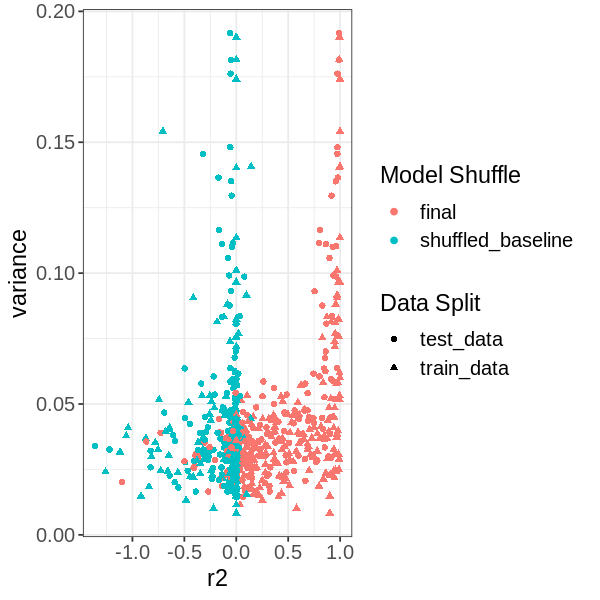

In [5]:
# set plot size 
options(repr.plot.width=5, repr.plot.height=5)
# set output path
global_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"global_variance_r2.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_variance_r2_path))) {
    print(dirname(global_variance_r2_path))
    dir.create(dirname(global_variance_r2_path), recursive = TRUE)
}
# plot df_var df
variance_r2_plot_global <- (
    ggplot(df_variance, aes(x=r2, y=actual_value,col=shuffle, shape = data_split)) 
    + geom_point() 
    + theme_bw()
    + labs(x="r2", y="variance") 
    # update the legend title
    + labs(shape = "Data Split", col = "Model Shuffle")
    # alter the text size of the legend title
    + theme(
        legend.title=element_text(size=14), 
        legend.text=element_text(size=12),
        axis.text.x = element_text(size=12),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(size=14),
        axis.title.y = element_text(size=14)
    )
    
)
ggsave(global_variance_r2_path, variance_r2_plot_global, width=5, height=5, dpi=500)
variance_r2_plot_global


Warning message:
“Removed 305 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 305 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 305 rows containing missing values (`geom_point()`).”


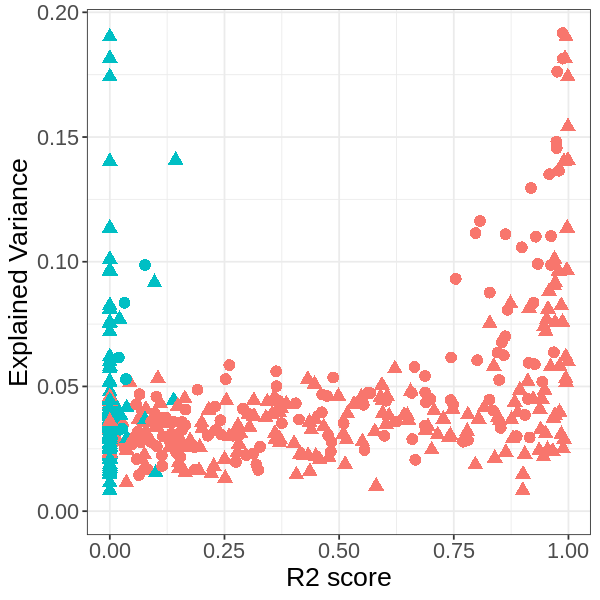

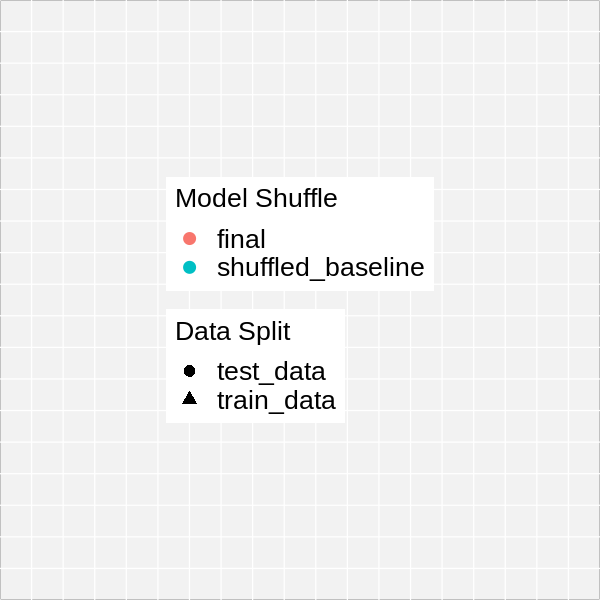

In [6]:
local_variance_r2_path <- file.path(paste0(enet_cp_fig_path,"local_variance_r2.png"))
local_variance_r2_legend_path <- file.path(paste0(enet_cp_fig_path,"local_variance_r2_legend.png"))
# if path does not exist, create it
if (!file.exists(dirname(local_variance_r2_path))) {
    print(dirname(local_variance_r2_path))
    dir.create(dirname(local_variance_r2_path), recursive = TRUE)
}
# same plot but only in the positive quadrant
variance_r2_plot_local <- (
    ggplot(df_variance, aes(x=r2, y=actual_value, col=shuffle, shape = data_split)) 
    + geom_point(size=3)
    + labs(x="R2 score", y="Explained Variance") 
    + theme_bw()
    + xlim(0, max(df_variance$r2))
    + ylim(0, max(df_variance$actual_value))
    # change the x and y axis text size
    + theme(
        axis.text.x = element_text(size=13), 
        axis.text.y = element_text(size=13), 
        legend.text=element_text(size=16), 
        axis.title=element_text(size=16),
        legend.title=element_text(size=16)
    )
    + labs(shape = "Data Split", col = "Model Shuffle")
    # make legend points bigger
    + guides(
        colour = guide_legend(override.aes = list(size=3)),
        shape = guide_legend(override.aes = list(size=3))
    )
)
legend <- get_legend(variance_r2_plot_local)
variance_r2_plot_local <- variance_r2_plot_local + theme(legend.position = "none")
ggsave(local_variance_r2_path, variance_r2_plot_local, width=5, height=5, dpi=500)
ggsave(local_variance_r2_legend_path, legend, width=5, height=5, dpi=500)
variance_r2_plot_local
plot(legend)


In [7]:
df_stats$shuffle_plus_data_split <- paste0(df_stats$shuffle, "_", df_stats$data_split)
# replace 'final_test_data' with 'Final + Test' and 'final_train_data' with 'Final + Train' 
df_stats$shuffle_plus_data_split <- gsub("final_test_data", "Final + Test", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("final_train_data", "Final + Train", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_test_data", "Shuffled + Test", df_stats$shuffle_plus_data_split)
df_stats$shuffle_plus_data_split <- gsub("shuffled_baseline_train_data", "Shuffled + Train", df_stats$shuffle_plus_data_split)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 239 rows containing non-finite values (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 239 rows containing non-finite values (`stat_smooth()`).”


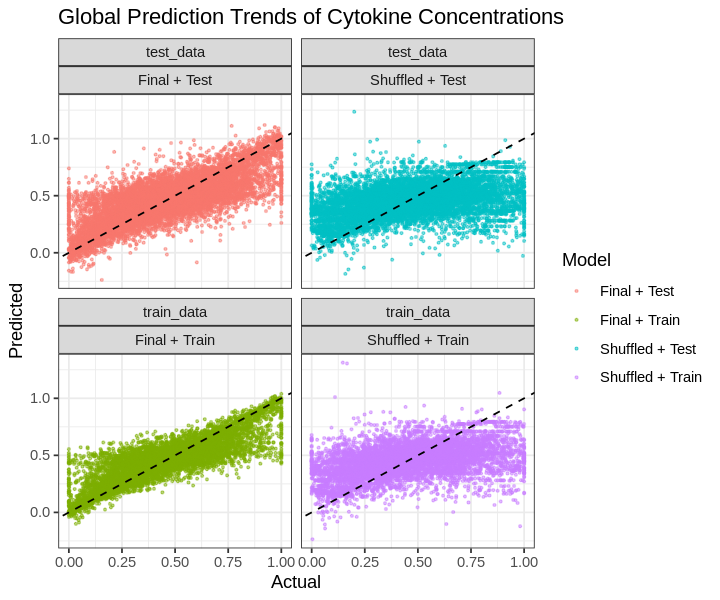

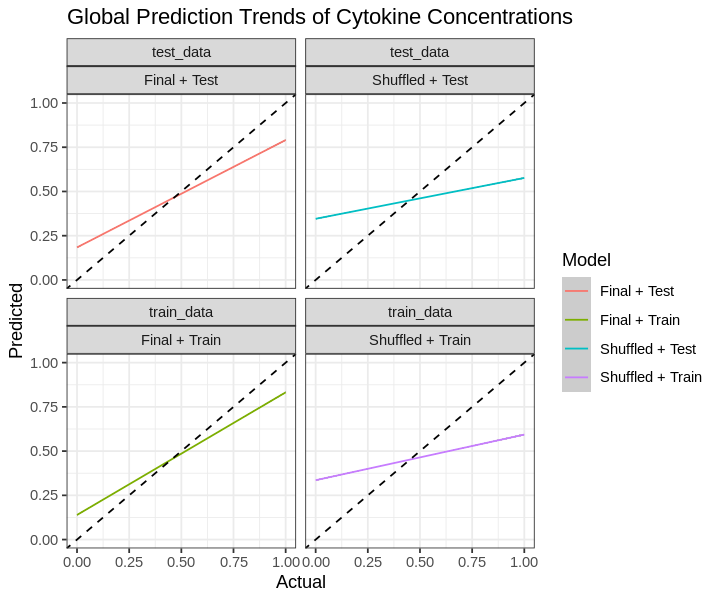

In [8]:
options(repr.plot.width=6, repr.plot.height=5)
# set output path
global_prediction_trend_path <- file.path(paste0(enet_cp_fig_path,"global_prediction_trend.png"))
# if path does not exist, create it
if (!file.exists(dirname(global_prediction_trend_path))) {
    print(dirname(global_prediction_trend_path))
    dir.create(dirname(global_prediction_trend_path), recursive = TRUE)
}
# plot the data
global_prediction_trend_scatter <- (
    ggplot(df_stats, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
    + geom_point(alpha=0.5, size=0.5) 
    # add geom smooth with each line being a different color
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    + labs(title="Global Prediction Trends of Cytokine Concentrations")
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
    + facet_wrap(data_split~shuffle_plus_data_split, ncol=2)
    + labs(color="Model", hjust=0.5)
)

# save the plot
ggsave(global_prediction_trend_path, global_prediction_trend_scatter, width=5, height=5, dpi=500)
global_prediction_trend_scatter

global_prediction_trend_line <- (
    ggplot(df_stats, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split)) 
    # add geom smooth with each line being a different color
    + geom_smooth(method="lm", se=TRUE, alpha=0.5, size=0.5, aes(col=shuffle_plus_data_split))
    # make colors different for each line
    + scale_fill_gradientn(colours = viridis(10))
    + labs(x="Actual", y="Predicted") 
    + theme_bw()
    + labs(title="Global Prediction Trends of Cytokine Concentrations")
    # add y=x line
    + geom_abline(intercept = 0, slope = 1, linetype="dashed", color="black")
    + facet_wrap(data_split~shuffle_plus_data_split, ncol=2)
    + ylim(0, 1)
    + xlim(0, 1)
    + labs(color="Model", hjust=0.5)
)
ggsave(global_prediction_trend_path, global_prediction_trend_line, width=5, height=5, dpi=500)
global_prediction_trend_line


In [9]:
pred_v_actual_plot <- function(df, cytokine){
    tmp_df <- df[df$cytokine == cytokine,]
    p <- (
        ggplot(tmp_df, aes(x=actual_value, y=predicted_value, col=shuffle_plus_data_split))
        + geom_point() 
        + theme_bw() 
        + geom_smooth(method=lm, se=TRUE, formula = y ~ x, alpha=0.5, size=0.5)
        + labs(x="Actual", y="Predicted") 

        + ggtitle(cytokine)
        + ylim(0, 1)
        + xlim(0, 1)
        + theme(
            axis.text.x = element_text(size = 12),
            axis.text.y = element_text(size = 12),
            axis.title.x = element_text(size = 16),
            axis.title.y = element_text(size = 16),
            # center the title
            plot.title = element_text(hjust = 0.5)
        )
        + labs(color="Model", hjust=0.5)

        # change facet label size
        + theme(strip.text.x = element_text(size = 12))
        + theme(strip.text.y = element_text(size = 12))
        # change legend text size
        + theme(legend.text=element_text(size=12))
        # change legend title size
        + theme(legend.title=element_text(size=14))
        # change legend title
        # make kegend key background white
        + guides(color = guide_legend(override.aes = list(fill = NA)),
            linetype = guide_legend(override.aes = list(fill = NA)))
        + theme(legend.key = element_rect(fill = "white"))
        )
    return(p)
}


Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 14 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 14 rows containing missing values (`geom_point()`).”


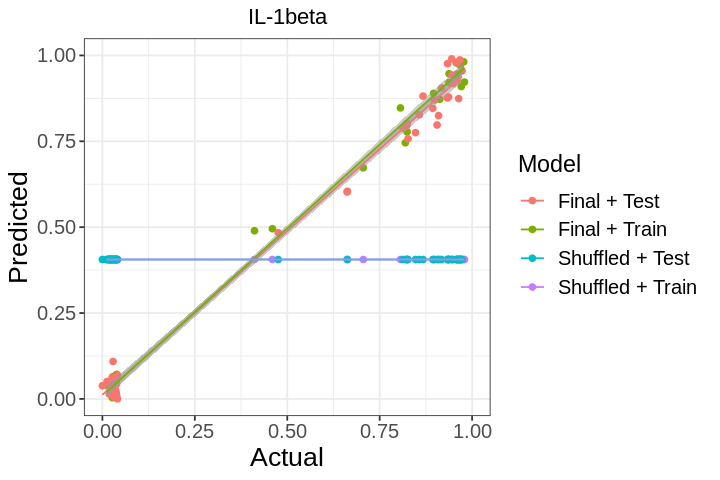

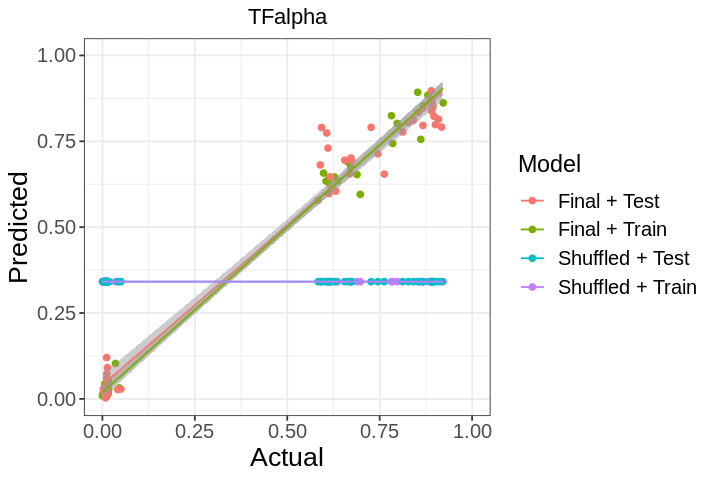

In [10]:
enet_cp_fig <- file.path(paste0(enet_cp_fig_path,"Predicted_vs_Actual_all_cytokines.png"))
# set plot size
width <- 6
height <- 4
options(repr.plot.width=width, repr.plot.height=height)
# subset the data to only include the cytokine of interest

IL1beta_a_v_p <- pred_v_actual_plot(df_stats, "IL-1beta")
TNFalpha_a_v_p <- pred_v_actual_plot(df_stats, "TFalpha")

IL1beta_a_v_p
TNFalpha_a_v_p


### Model Performances

In [11]:
# calculate the se of each metric for each shuffle, data_split, and cytokine in R
agg_df <- aggregate(log10_neg_mean_absolute_error ~ shuffle + data_split + cytokine + treatment, df_stats, function(x) c(mean = mean(x), sd = sd(x)))
# split the log10_neg_mean_absolute_error column into two columns
agg_df <- cbind(agg_df, agg_df$log10_neg_mean_absolute_error)
# remove the log10_neg_mean_absolute_error column by name
agg_df <- agg_df[, !names(agg_df) %in% c('log10_neg_mean_absolute_error')]
# rename the columns 
colnames(agg_df) <- c("shuffle", "data_split", "cytokine", "treatment","mean_log10_neg_mean_absolute_error", "sd_log10_neg_mean_absolute_error")


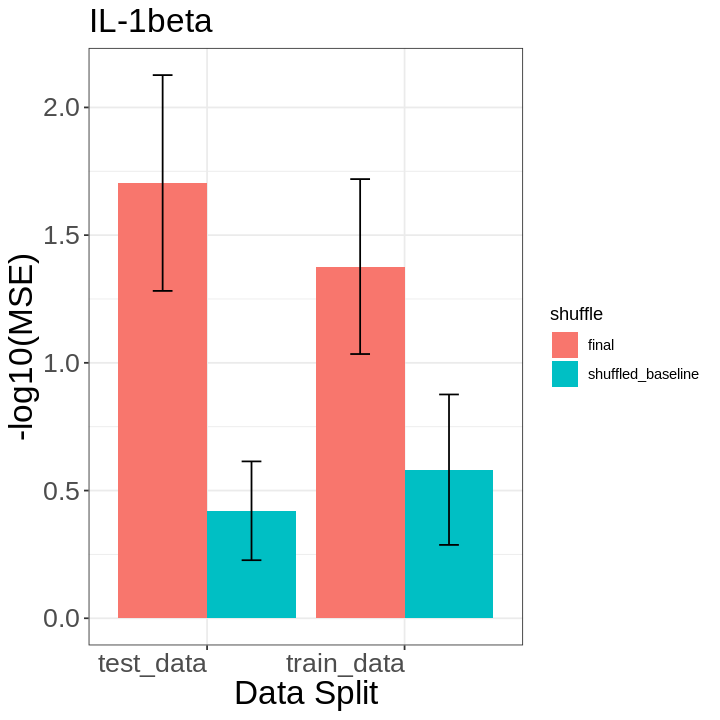

In [12]:
# per cytokine graph
file_path <- file.path(paste0(enet_cp_fig_path))
# if path does not exist, create it
if (!file.exists(dirname(file_path))) {
    print(dirname(file_path))
    dir.create(dirname(file_path), recursive = TRUE)
}
file=file.path(paste0(file_path,"individual_cytokine_prediction_metric.png"))

cytokine <- "IL-1beta"
# set output path
# set plot size
width <- 6
height <- 6
options(repr.plot.width=width, repr.plot.height=height)
# plot a bar plot of the mean log10_neg_mean_absolute_error for each data split, cytokine, and shuffle with error bars
tmp_df <- agg_df[agg_df$cytokine == cytokine,]
# get the mean and sd of the log10_neg_mean_absolute_error for each data split, cytokine, and shuffle
tmp_df <- aggregate(mean_log10_neg_mean_absolute_error ~ shuffle + data_split, tmp_df, function(x) c(mean = mean(x), sd = sd(x)))
# split the log10_neg_mean_absolute_error column into two columns
tmp_df <- cbind(tmp_df, tmp_df$mean_log10_neg_mean_absolute_error)
# drop the log10_neg_mean_absolute_error column by name
tmp_df <- tmp_df[, !names(tmp_df) %in% c('mean_log10_neg_mean_absolute_error')]
# split the mean_log10_neg_mean_absolute_error column into two columns

model_performance_il1b <- (
    ggplot(tmp_df, aes(x=data_split, y=mean, fill=shuffle)) 
        + geom_bar(stat="identity", position=position_dodge()) 
        + geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) 
        + labs(x="Data Split", y="log10_neg_mean_absolute_error") 
        + ggtitle(cytokine)
        + theme_bw()
        + theme(
            axis.text.x = element_text(hjust = 1, size=16),
            axis.text.y = element_text(size=16),
            axis.title.x = element_text(size=20),
            axis.title.y = element_text(size=20),
            plot.title = element_text(size=20)
        )
        + ylab("-log10(MSE)")
)
model_performance_il1b


## Coefficient Plots

In [13]:
# path set
input_file_path <- file.path(paste0("../../6.bulk_Morphology_Elastic_Network/3.model_coefficients/results/regression/",cell_type))
# read in the data
output_path <- file.path(paste0("./figures/","regression/",cell_type,"/"))
# create output directory if it doesn't exist
dir.create(output_path, recursive = TRUE, showWarnings = FALSE)


In [14]:
## function to process the data for visualization
process_subset_data <- function(df){
    # read in the data
    # data <- read.csv(data_path, header = TRUE, sep = ",", stringsAsFactors = FALSE)
    # get the basename of the files

    data <- df %>%
        dplyr::arrange(desc(abs(coefficients))) %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel) %>%
        dplyr::arrange(desc(abs(coefficients)))

    # Clean channel for visualization
    data$channel_learned <- dplyr::recode(data$channel,
            "CorrDNA" = "nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "gasdermin",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )
    data <- data %>%
        dplyr::group_by(feature_group, channel_learned, compartment) %>%
        dplyr::slice_max(order_by = coefficients, n = 1)
    return(data)
}


In [15]:
plot_coeffs <- function(df, cytokine, shuffle){

# plot the data
    coef_gg <- (
    ggplot(df, aes(x = channel_learned, y = feature_group))
    + geom_point(aes(fill = abs(coefficients)), pch = 22, size = 6)
    + facet_wrap("~compartment", ncol = 3)
    + theme_bw()
    + scale_fill_continuous(
        name="Top Abs. val\ntreatment\nlinear model\ncoefficient",
        low = "darkblue",
        high = "yellow",
    )
    + xlab("Channel")
    + ylab("Feature")
    + theme(
        axis.text = element_text(size = 10),
        axis.title = element_text(size = 10),
        title = element_text(size = 14),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 12),
    )
    # rotate x axis labels
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + ggtitle(paste0("Top Abs. val treatment ElasticNet coefficients for \n",cytokine,shuffle," model"))
    + theme(plot.title = element_text(hjust = 0.5))
    )
    return(coef_gg)
}


In [16]:
# get all files in a directory
files <- list.files(path = input_file_path, pattern = "*.csv", full.names = TRUE)

# create empty list (mimics a dictionary )
nested_list <- list(
        filename = list(),
        cytokine = list(),
        shuffle = list()
    )

for (i in files){
    filename <- basename(i)
    # split the string at the first _
    filename <- strsplit(filename, "_", fixed = TRUE)[[1]]
    cytokine <- filename[1]
    shuffle <- filename[2]
    nested_list$filename <- c(nested_list$filename, i)
    nested_list$cytokine <- c(nested_list$cytokine, cytokine)
    nested_list$shuffle <- c(nested_list$shuffle, shuffle)
}


In [17]:
cytokine <- 'IL-1 beta [NSU]'
shuffle <- 'final'
filename <- nested_list$filename[which(nested_list$cytokine == cytokine & nested_list$shuffle == shuffle)]
# set to string
filename <- filename[[1]]

il1beta_final <- read.csv(filename, header = TRUE, sep = ",", stringsAsFactors = FALSE)


Warning message:
“Expected 6 pieces. Additional pieces discarded in 265 rows [30, 38, 45, 51, 57,
64, 66, 67, 73, 75, 81, 82, 85, 92, 94, 100, 104, 105, 107, 110, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 329 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


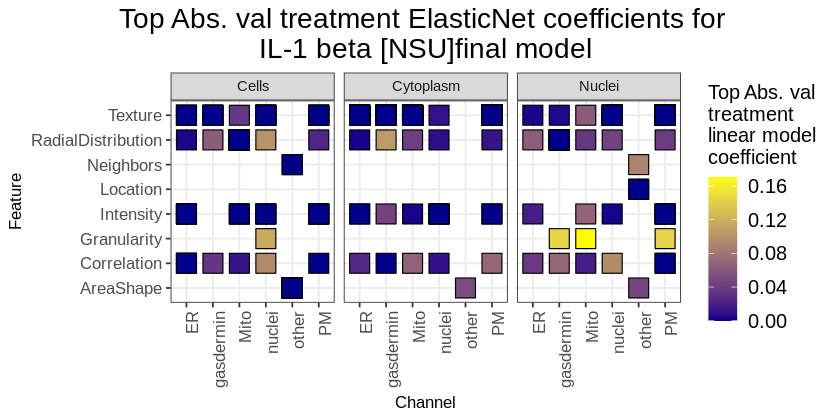

In [18]:
il1beta_final <- process_subset_data(il1beta_final)
il1beta_final_plot <- plot_coeffs(il1beta_final, cytokine, shuffle)
# output
coef_gg_file <- file.path(paste0(output_path,"/","top_abs_val_coefficients_enet.pdf"))
# set plot size
width <- 7
height <- 3.5
options(repr.plot.width=width, repr.plot.height=height)
ggsave(coef_gg_file, il1beta_final_plot, width=width, height=height, dpi=500)
il1beta_final_plot


### Boxplot of Coefficients

In [19]:
# set cell type
cell_type <- "PBMC"


In [20]:
# set path for data of all models
data_path <- file.path(paste0("../../6.bulk_Morphology_Elastic_Network/4.model_performance/results/regression/", cell_type, "/", "all_model_performance.csv"))
df <- read.csv(data_path)
# setfigure path
figure_path <- file.path(paste0("../figures/regression/", cell_type, "/"))
# make the directory if it doesn't exist
dir.create(figure_path, recursive = TRUE, showWarnings = FALSE)


In [21]:
# select MMP-1 secreted protein as the target
df <- df %>% filter(shuffle == "final")


In [22]:
# select rows that have r2 > 0.5
df <- df %>% filter(r2 > 0.5)
# filter rows that have coeff = 0
df <- df %>% filter(coefficients != 0)


In [23]:
# get the feature names for color bar visualization 
features <- df %>% select(feature_names)
# drop duplicate features from the feature names
features <- unique(features)
features <- features %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel)

    # Clean channel for visualization
    features$channel_learned <- dplyr::recode(features$channel,
            "CorrDNA" = "nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "gasdermin",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )


Warning message:
“Expected 6 pieces. Additional pieces discarded in 265 rows [5, 47, 55, 69, 70,
71, 74, 78, 81, 82, 85, 91, 94, 97, 98, 99, 100, 102, 105, 106, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 329 rows [1, 2, 3, 4, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 23, 24, ...].”


In [24]:
r2_df <- df %>% select(r2)
r2_df <- unique(r2_df)
column_ha <- HeatmapAnnotation(
    df = r2_df,
    show_legend = TRUE,
    annotation_name_side = "right",
    # rotate the title
    annotation_legend_param = list(
        title_gp = gpar(fontsize = 16, angle = 0),
        labels_gp = gpar(fontsize = 16, angle = 0)
    ),
    # set color bar for r2 continuous value with brewer palette
    col = list(r2 = colorRamp2(c(0, 1), c(brewer.pal(9,"YlGn")[1], brewer.pal(9,"YlGn")[7])))
)                   


In [25]:
# make the df into a matrix for heatmap
mat <- dcast(df, feature_names ~ secreted_proteins, value.var = "coefficients")
row.names(mat) <- mat$feature_names
mat <- mat %>% select(-feature_names)
mat <- as.matrix(mat)
# na to 0
mat[is.na(mat)] <- 0
# drop rows that have 0 in 50% of the columns
mat <- mat[rowSums(mat != 0) > ncol(mat)/2, ]
mat <- as.data.frame(mat)
# get the feature names from the index
mat$feature_names <- row.names(mat)
# get the feature names for color bar visualization
features <- mat %>% select(feature_names)
# drop duplicate features from the feature names
features <- unique(features)
features <- features %>%
        tidyr::separate(
            feature_names,
            into = c(
                "compartment",
                "feature_group",
                "measurement",
                "channel", 
                "parameter1", 
                "parameter2"
            ),
            sep = "_",
            remove = FALSE
        ) %>%
        dplyr::mutate(channel_cleaned = channel)

    # Clean channel for visualization
    features$channel_learned <- dplyr::recode(features$channel,
            "CorrDNA" = "nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "gasdermin",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )

# set annotations
row_ha <- rowAnnotation(
    Compartment = features$compartment, 
    Feature_Type = features$feature_group, 
    Channel = features$channel_learned, 
    show_legend = TRUE,
    annotation_legend_param = list(title_position = "topcenter", title_gp = gpar(fontsize = 16, angle = 0), labels_gp = gpar(fontsize = 16, title = gpar(fontsize = 16))),
    annotation_name_side = "bottom",
    
    # color
    col = list(
        Compartment = c(
            "Cells" = brewer.pal(12, "Accent")[7], 
            "Cytoplasm" = brewer.pal(12, "Accent")[6], 
            "Nuclei" = brewer.pal(12, "Accent")[5]
        ),
        Feature_Type = c(
            "AreaShape" = brewer.pal(12, "Paired")[1], 
            "Correlation" = brewer.pal(12, "Paired")[2], 
            "Granularity" = brewer.pal(12, "Paired")[5], 
            "Neighbors" = brewer.pal(12, "Paired")[8], 
            "RadialDistribution" = brewer.pal(12, "Paired")[10], 
            "Texture" = brewer.pal(12, "Paired")[11]
        ),
        # manually define the color for each channel to match the wavelegnth-ish
        Channel = c(
            "nuclei" = "#0000AB",
            "Mito" = "#B000B0",
            "ER" = "#00D55B",
            "gasdermin" = "#FFFF00",
            "PM" = "#C90000",
            "other" = "#B09FB0")
    )
)
                
# drop the feature names column
mat <- mat %>% select(-feature_names)
mat <- as.matrix(mat)


Warning message:
“Expected 6 pieces. Additional pieces discarded in 3 rows [23, 24, 25].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 21 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...].”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Warning message in brewer.pal(12, "Accent"):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”


The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



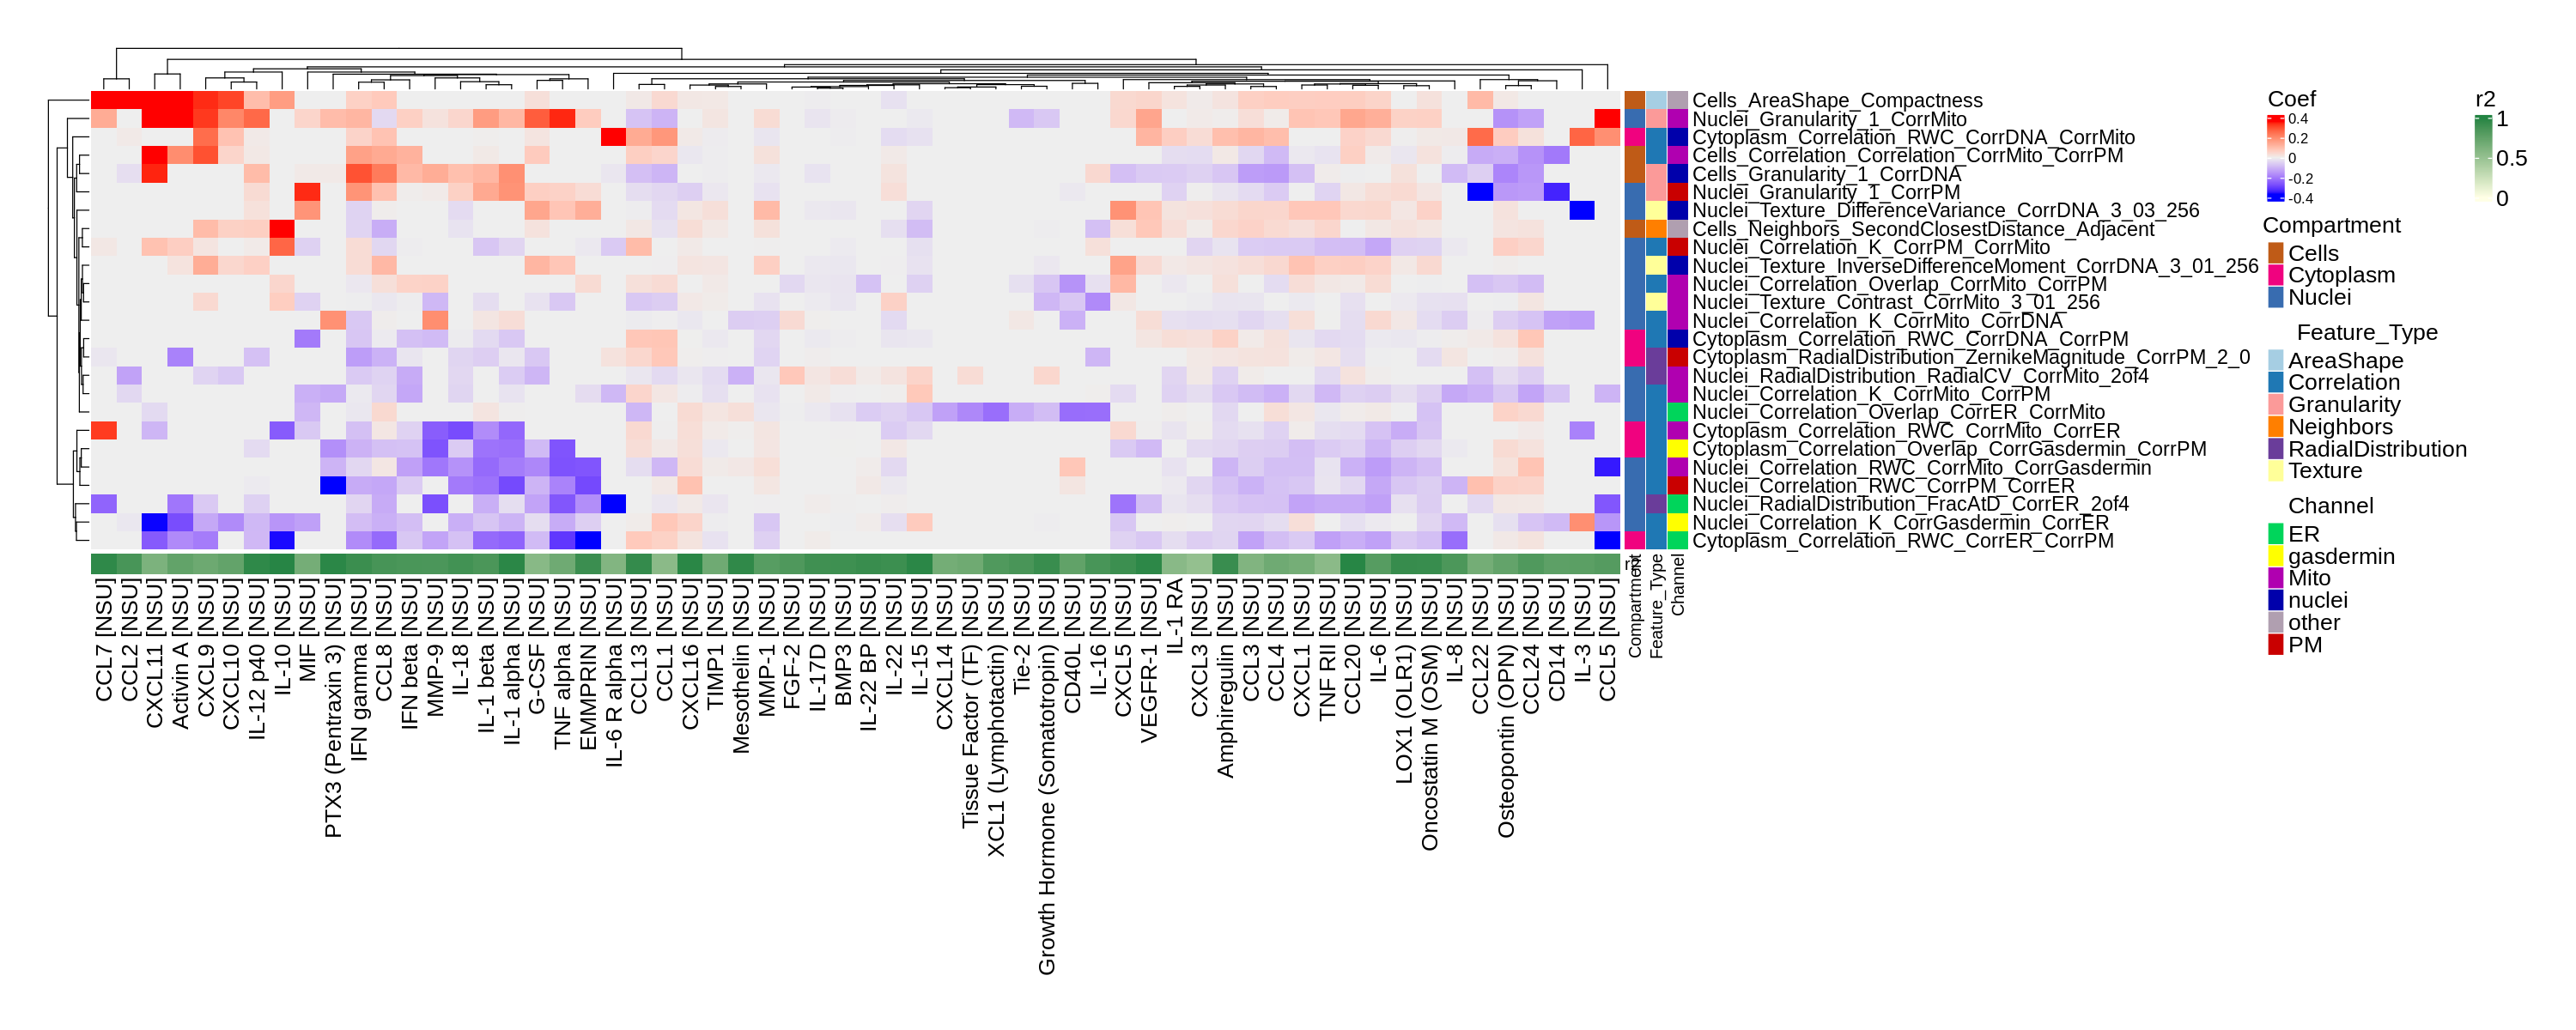

In [26]:
# plot size
width <- 25
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
# change margins
par(mar = c(1, 1, 1, 1))

model_heatmap <- (
        Heatmap(
        mat, 
        cluster_rows = TRUE,    # Cluster rows
        cluster_columns = TRUE, # Cluster columns
        show_row_names = TRUE,  # Show row names
        show_column_names = TRUE, # Show column names
        column_names_gp = gpar(fontsize = 16), # Column name label formatting
        row_names_gp = gpar(fontsize = 14),    # Row name label formatting
        right_annotation = row_ha,
        bottom_annotation = column_ha,
        # rename fill legend
        heatmap_legend_param = list(title = "Coef", title_position = "topcenter", title_gp = gpar(fontsize = 16)),
        column_names_max_height = unit(7, "in"),
        row_names_max_width = unit(5.5, "in"),
        # color bar text size bigger
        )     
)

# ggplotify model_heatmap
model_heatmap <- as.ggplot(model_heatmap)
model_heatmap <- model_heatmap +   theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))

# save the figure
ggsave(file = paste0(figure_path, "filtered_features.svg"), plot = model_heatmap, width = width, height = height, units = "in", dpi = 500)
ggsave(file = paste0(figure_path, "filtered_features.png"), plot = model_heatmap, width = width, height = height, units = "in", dpi = 500)

model_heatmap


## Assemble all sub-figures into a single figure via patchwork

Sub-figures by plot name: grob objects  

4A: Variance explained by the ElasticNet Model Local (Global in Supplement) vs R2 score  
4B: Predicted vs. Actual Secreted Protein Levels (A few examples the reest in supplement)   
4C: Model performance (i.e. MSE and R2) for a couple of different models (the rest in supplement)  
4D: Box plots of over all model performance (R2 for the test splits and shuffles splits)  
4E: Beta coefficient levels for each type of feature per model (the extras go in the supplement)  
4F: Heatmap of the morphology features vs the model performance of the Models (all ANOVA selected)  

## Supplemental Figure S4:

S4A: Global explained variance for the models  
S4B: Predicted vs. Actual Secreted Protein Levels other examples  
S4C:   
S4D:  
S4E:  
S4F:  
S4G:  
S4H:  

names of the plots:
- 4A: "variance_explained"
    variance_r2_plot_local
- 4B: "predicted_vs_actual"
    IL1beta_a_v_p
    TNFa_a_v_p
- 4C: "model_performance"
    model_performance_il1b
- 4D: "model_performance_boxplot"
- 4E: "beta_coefficients"
    il1beta_final_plot
- 4F: "model_performance_heatmap"
    model_heatmap


In [27]:
# preprocess the figures

# remove all titles on the figures
variance_r2_plot_local <- variance_r2_plot_local + theme(plot.title = element_blank())
IL1beta_a_v_p <- IL1beta_a_v_p + theme(plot.title = element_blank())
model_performance_il1b <- model_performance_il1b + theme(plot.title = element_blank())
il1beta_final_plot <- il1beta_final_plot + theme(plot.title = element_blank())
model_heatmap <- model_heatmap + theme(plot.title = element_blank())


Warning message:
“Removed 305 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 13 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


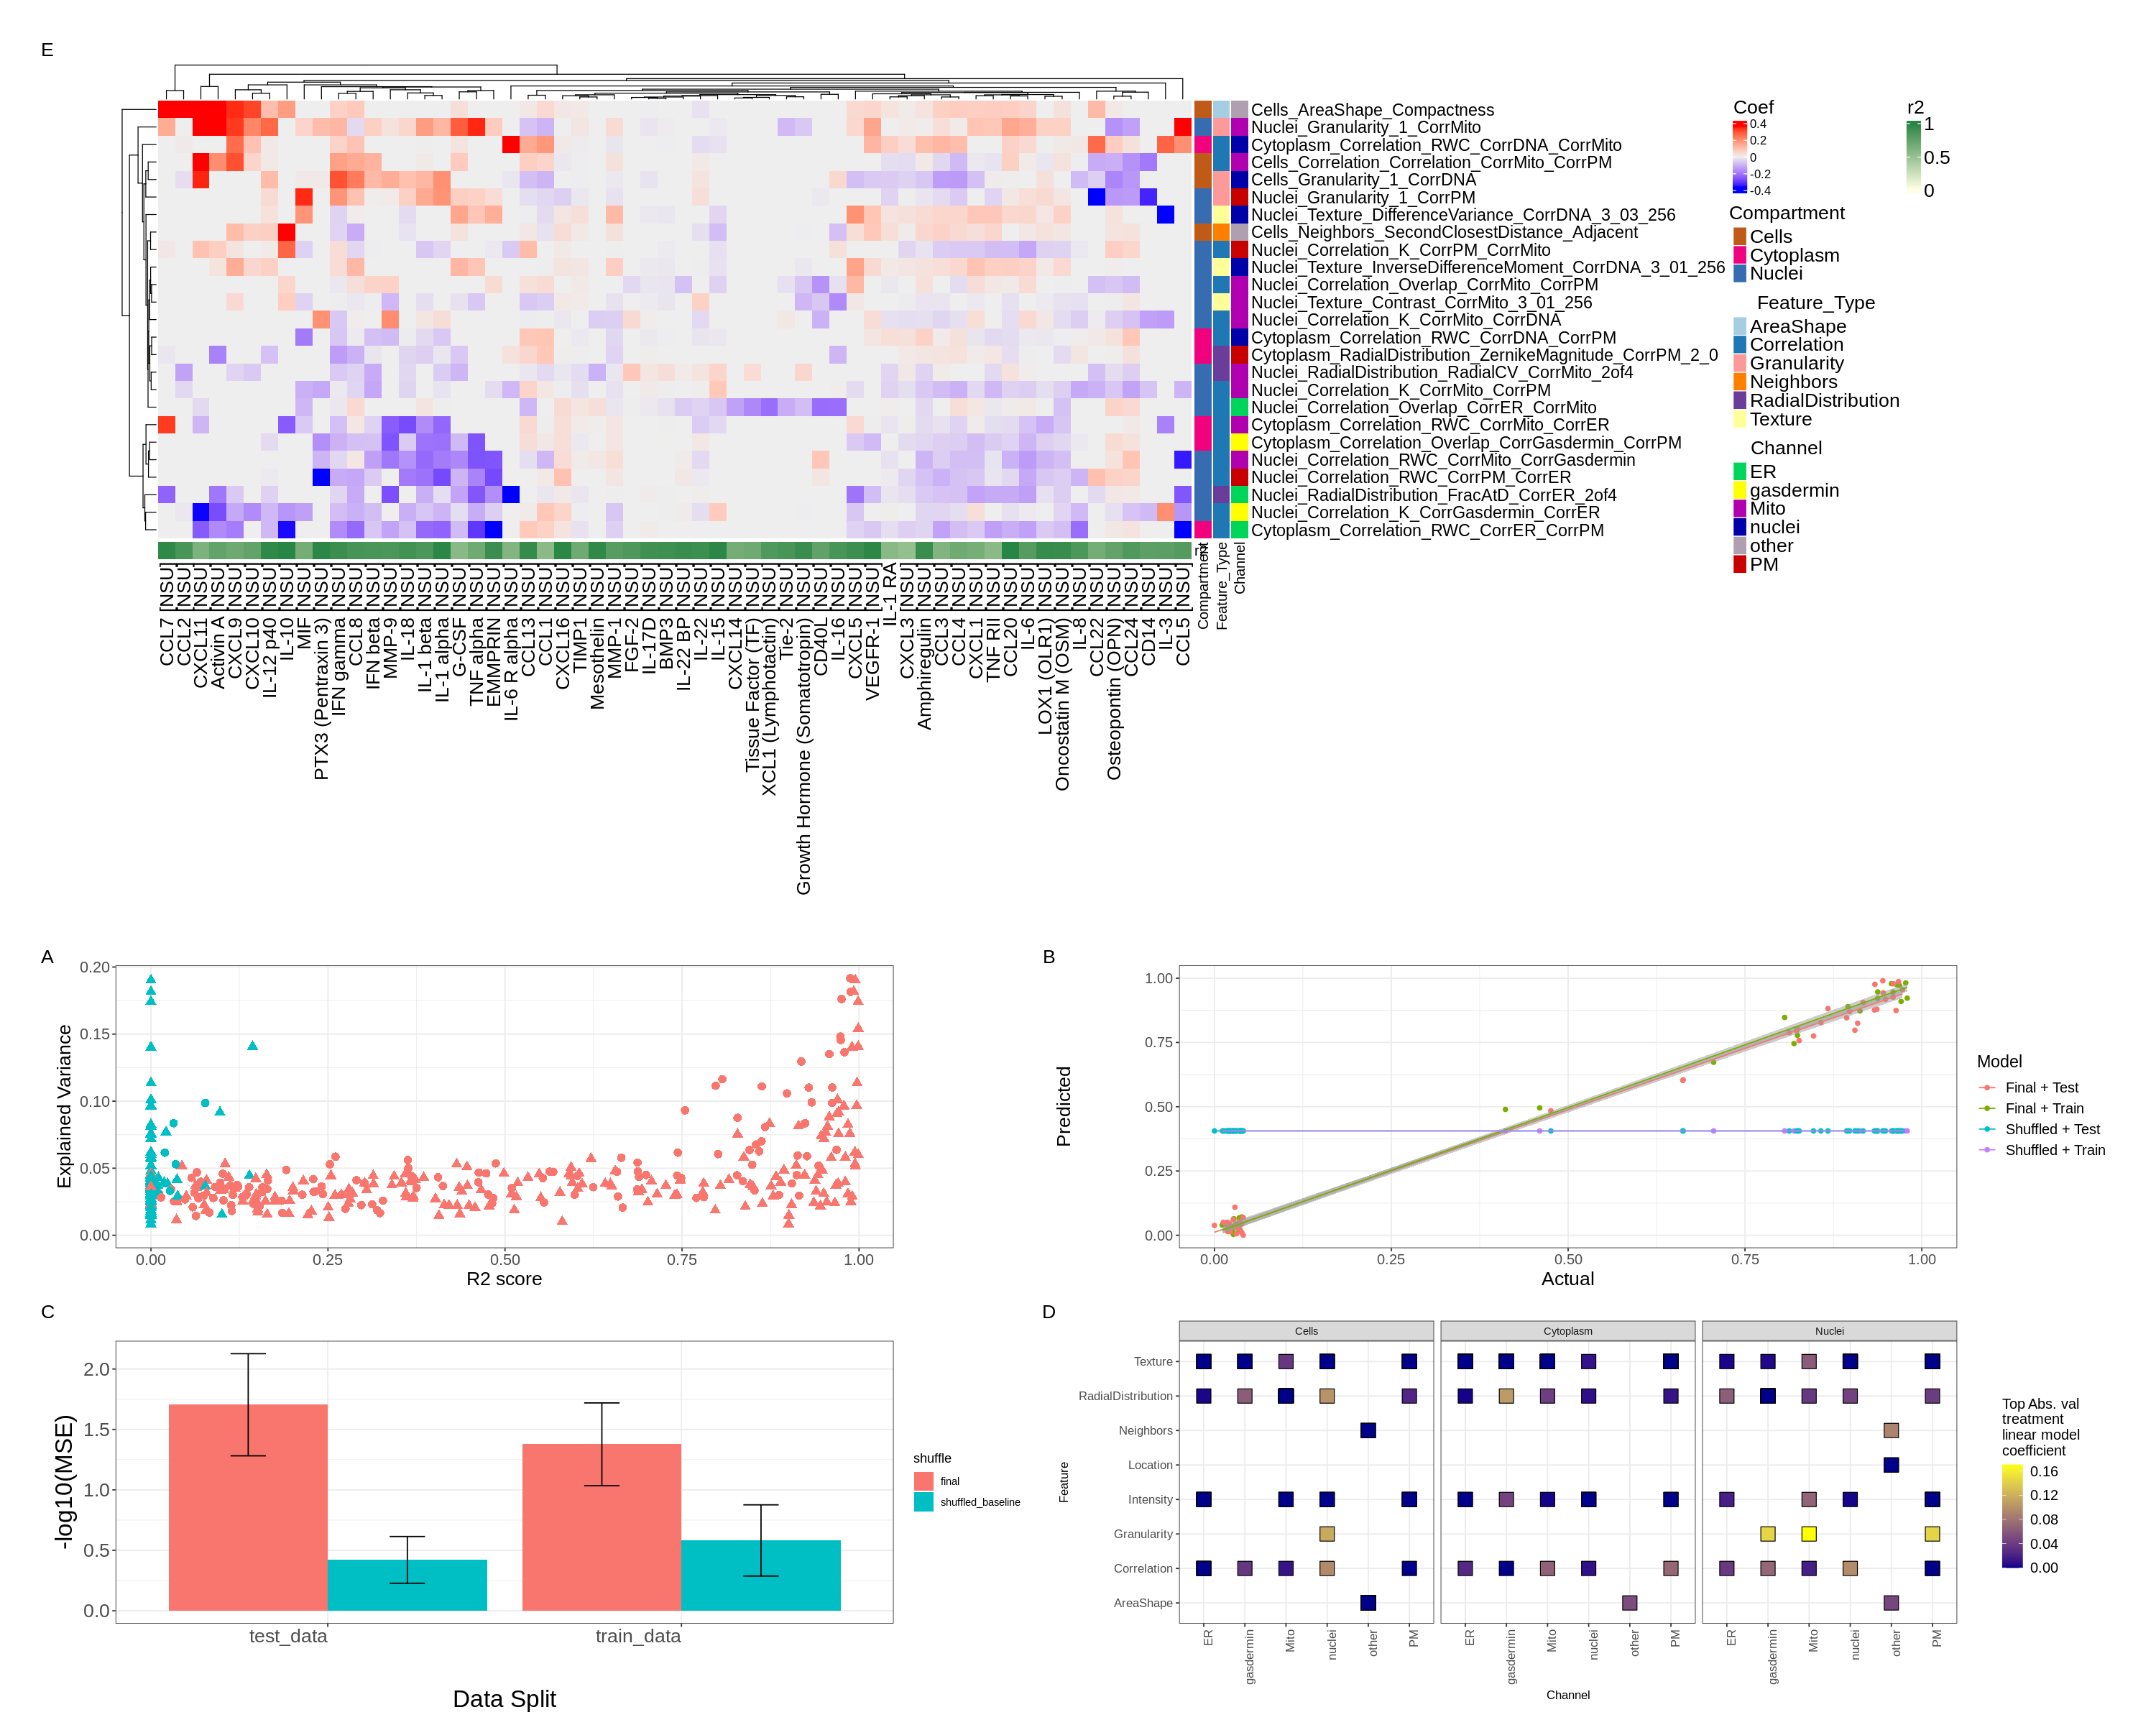

In [28]:

# pathwork layout of each plot ( letters correspond to the order in which the plots are defined below in the pathwork figure)
# where A is the first plot defined and B is the second plot defined, etc.
design <-   "
            EEEE#
             EEEE#
             EEEE#
             AABB#
             CCDD#
             "

# set plot size
width <- 25
height <- 20
options(repr.plot.width=width, repr.plot.height=height)
fig2 <- (
    variance_r2_plot_local
    + IL1beta_a_v_p
    # + TNFalpha_a_v_p
    + model_performance_il1b
    + il1beta_final_plot
    + model_heatmap
    + plot_layout(design = design)
    + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 16))
)
fig2
